<a href="https://colab.research.google.com/github/MarcinAn/analiza_danych/blob/main/analiza_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pobieranie danych**

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('HRDataset.csv')
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'],
      dtype='object')

# **Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?**

In [217]:
manager_performance= df[['ManagerName','PerformanceScore']]
manager_performance.dropna(inplace= True)
manager_performance['PerformanceCount']= manager_performance['PerformanceScore']
manager_performance_pivot=manager_performance.pivot_table(values= 'PerformanceCount', index= 'ManagerName', columns= 'PerformanceScore', aggfunc= 'count').fillna(0)

def sum_rows(row):
  percent = row['Exceeds'] + row['Fully Meets'] + row['Needs Improvement'] + row['PIP']
  return percent

manager_performance_pivot['Exceeds_percent']= round(manager_performance_pivot['Exceeds'] / manager_performance_pivot.apply(lambda row: sum_rows(row),axis=1),2)
manager_performance_pivot['Fully_meets_percent']= round(manager_performance_pivot['Fully Meets'] / manager_performance_pivot.apply(lambda row: sum_rows(row),axis=1),2)
manager_performance_pivot['Needs_improvement_percent']= round(manager_performance_pivot['Needs Improvement'] / manager_performance_pivot.apply(lambda row: sum_rows(row),axis=1),2)
manager_performance_pivot['PIP_percent']= round(manager_performance_pivot['PIP'] / manager_performance_pivot.apply(lambda row: sum_rows(row),axis=1),2)
manager_performance_pivot.drop(['Exceeds',	'Fully Meets',	'Needs Improvement',	'PIP'], axis= 1, inplace= True)

<ipython-input-217-9a93a82fd41c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manager_performance.dropna(inplace= True)
<ipython-input-217-9a93a82fd41c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manager_performance['PerformanceCount']= manager_performance['PerformanceScore']


<Figure size 640x480 with 0 Axes>

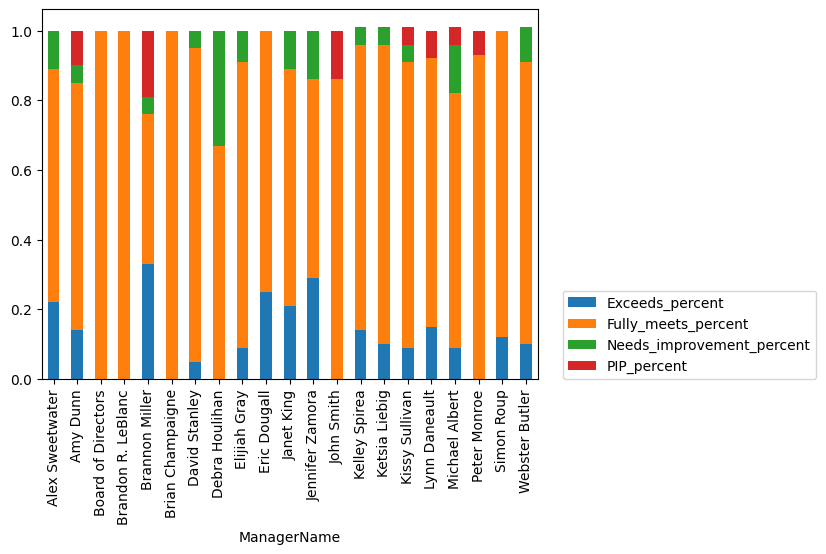

In [218]:
from numpy.ma.core import size
plt.figure()
ax= manager_performance_pivot.plot(kind= 'bar', stacked= True)
ax.legend(loc= (1.05,0.0))
plt.show()

***Analiza wyników pokazuje, że managerowie określją pracowników pozytywnie, jako fully meets oraz exceeds. Ocena Needs improvement oraz PIP dotyczy widocznie mniejszej ilości pracowników***

---



# **Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?**

In [219]:
recruitment_seniority= df[['RecruitmentSource', 'DateofHire', 'DateofTermination', 'Employee_Name']]
recruitment_seniority.dropna(inplace= True)

<ipython-input-219-b6b63bd993a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recruitment_seniority.dropna(inplace= True)


In [220]:
recruitment_seniority['DateofTermination']= pd.to_datetime(df['DateofTermination'], format='%m/%d/%y')
recruitment_seniority['DateofHire']= pd.to_datetime(df['DateofHire'], format='%m/%d/%Y')

<ipython-input-220-5579355b54b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recruitment_seniority['DateofTermination']= pd.to_datetime(df['DateofTermination'], format='%m/%d/%y')
<ipython-input-220-5579355b54b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recruitment_seniority['DateofHire']= pd.to_datetime(df['DateofHire'], format='%m/%d/%Y')


In [221]:
import datetime as dt
def count_seniority(row):
  if pd.isnull(row['DateofTermination']):
    end_date= dt.datetime(2019,9,27)
  else:
    end_date= row['DateofTermination']
  return (end_date- row['DateofHire'])/np.timedelta64(1,'Y')

In [222]:
recruitment_seniority['Seniority'] = recruitment_seniority.apply(lambda row: count_seniority(row),axis=1)

<ipython-input-222-6fa5160e980a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recruitment_seniority['Seniority'] = recruitment_seniority.apply(lambda row: count_seniority(row),axis=1)


In [223]:
recruitment_seniority_group= recruitment_seniority.groupby(['RecruitmentSource', 'Employee_Name']).agg({'Seniority':'sum'})
recruitment_seniority_group.reset_index(inplace=True)
recruitment_seniority_group.sort_values(by='Seniority', ascending= False, inplace= True)

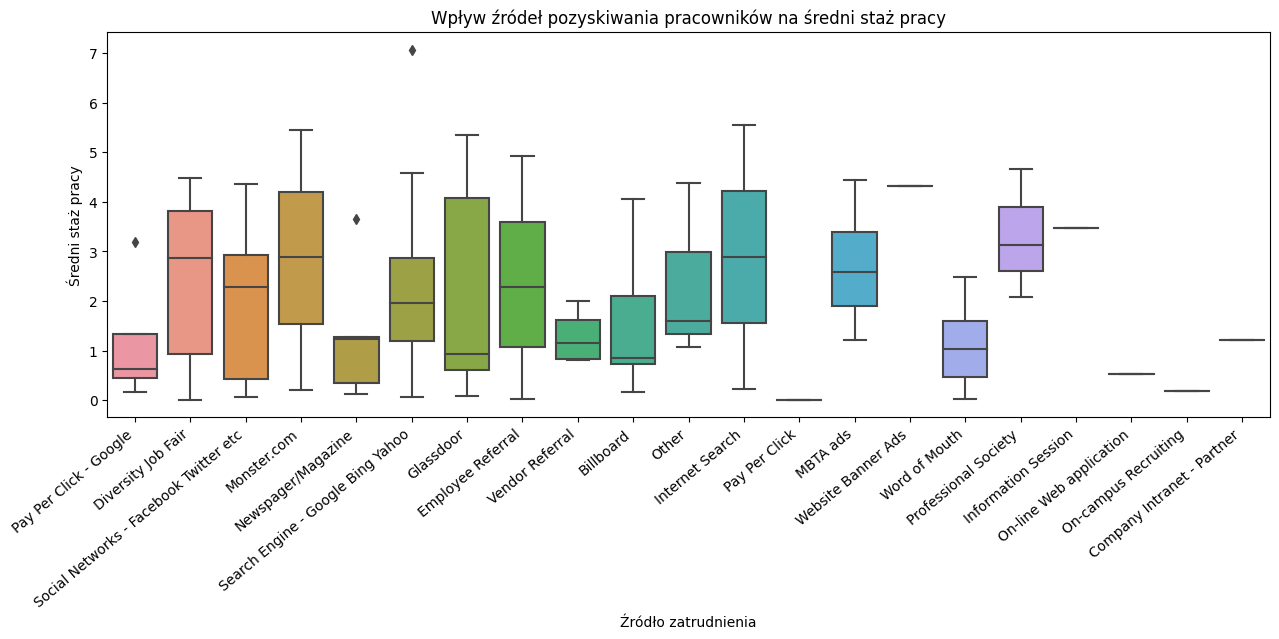

In [224]:
plt.figure(figsize=(15,5))
ax=sns.boxplot(x= 'RecruitmentSource',y= 'Seniority', data=recruitment_seniority)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha= "right")
plt.xlabel('Źródło zatrudnienia')
plt.ylabel('Średni staż pracy')
plt.title('Wpływ źródeł pozyskiwania pracowników na średni staż pracy')
plt.show()

**Pracownicy z najdłuższym stażem pracy zostali pozyskani przy pomocy "Website Banner Ads"**

---



# **Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?**

In [225]:
marital_satisfaction= df[['MaritalDesc', 'EmpSatisfaction']]
marital_satisfaction.dropna(inplace= True)
marital_satisfaction
marital_satisfaction_pivot=marital_satisfaction.pivot_table(values= 'EmpSatisfaction', index= 'MaritalDesc', aggfunc= 'mean')
marital_satisfaction_pivot.reset_index(inplace= True)
marital_satisfaction_pivot.sort_values(by= 'EmpSatisfaction', ascending= False, inplace= True)

<ipython-input-225-da1e7edb9530>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marital_satisfaction.dropna(inplace= True)


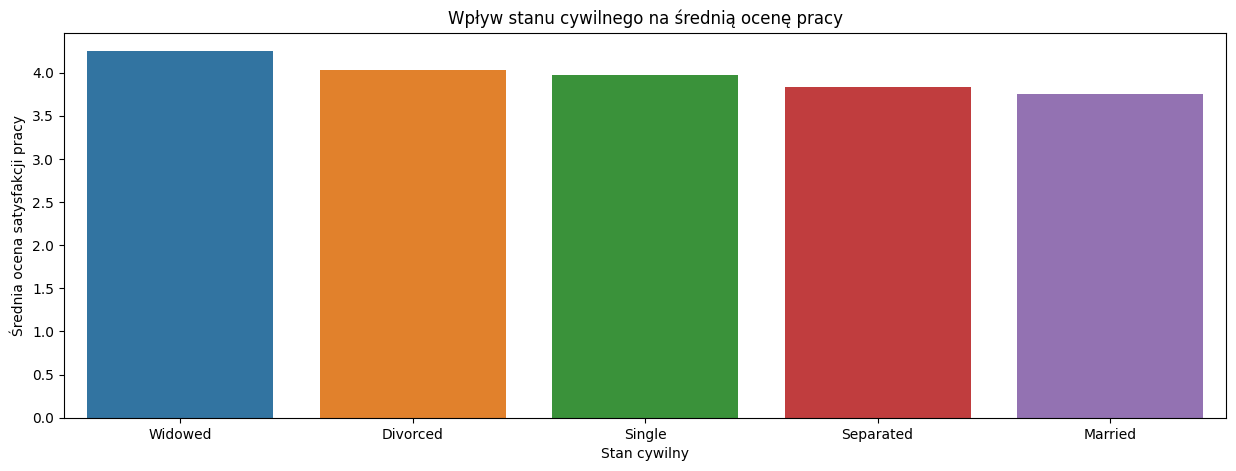

In [226]:
plt.figure(figsize= (15,5))
sns.barplot(x= 'MaritalDesc',y= 'EmpSatisfaction', data= marital_satisfaction_pivot)
plt.xlabel('Stan cywilny')
plt.ylabel('Średnia ocena satysfakcji pracy')
plt.title('Wpływ stanu cywilnego na średnią ocenę pracy')
plt.show()

In [227]:
print(round(marital_satisfaction_pivot.iloc[0,1]-marital_satisfaction_pivot.iloc[4,1],1))

0.5


**Różnica pomiędzy najlepiej oceniającymi swoją pracę "Windowed" a najgorzej oceniającymi "Married" wynosi około 0,5 punkta. Zadowolenie pracy jest w minimalnym stopniu zależne od stanu cywilnego**

---



# **Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?**

In [228]:
age=df[['DOB', 'DateofTermination','SpecialProjectsCount', 'Sex']]
age.fillna(0, inplace= True)
age=age[age['DateofTermination'] == 0]
age.drop('DateofTermination', axis= 1, inplace= True)
age=age[age['DOB'] != 0]

<ipython-input-228-32f2783c2527>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age.fillna(0, inplace= True)


In [229]:
def fix_year(x):
  if (int(x[-2:]) > 23):
    return 2023 - (1900 + int(x[-2:]))
  else:
    return 2023 - (2000 + int(x[-2:]))
age['age']=age['DOB'].apply(lambda x: fix_year(x))

In [230]:
age_pivot=age.pivot_table(values= 'DOB', index=['age', 'Sex'], aggfunc= 'count')
age_pivot.reset_index(inplace= True)
age_pivot= age_pivot[((age_pivot['Sex'] == 'F') & (age_pivot['age'] <= 60)) | ((age_pivot['Sex'] != 'F') & (age_pivot['age'] <= 65))]
age_pivot.sort_values(by= 'age', inplace= True)

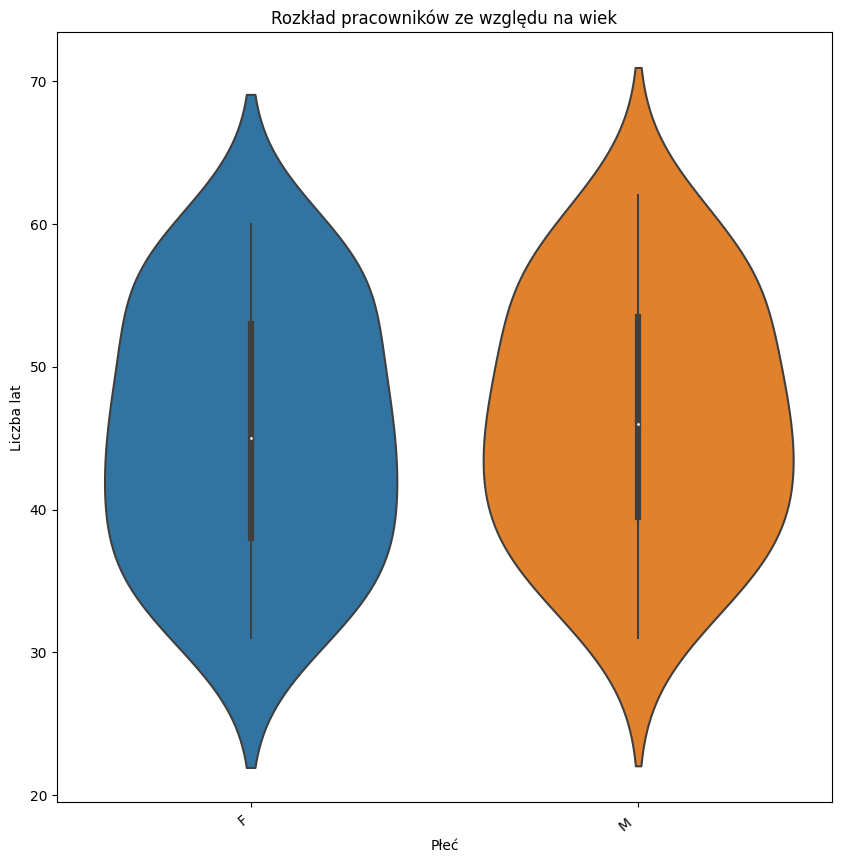

In [231]:
plt.figure(figsize= (10,10))
ax=sns.violinplot(x= 'Sex', y= 'age', data= age_pivot)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha= "right")
plt.xlabel('Płeć')
plt.ylabel('Liczba lat')
plt.title('Rozkład pracowników ze względu na wiek')
plt.show()

# **Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?**

In [232]:
special_pivot=age.pivot_table(values= 'SpecialProjectsCount', index= ['age', 'Sex'], aggfunc= 'sum')
special_pivot.reset_index(inplace= True)
special_pivot=special_pivot[((special_pivot['Sex'] == 'F') & (special_pivot['age'] <= 60)) | ((special_pivot['Sex'] != 'F') & (special_pivot['age'] <= 65))]
special_pivot.sort_values(by= 'age', inplace= True)

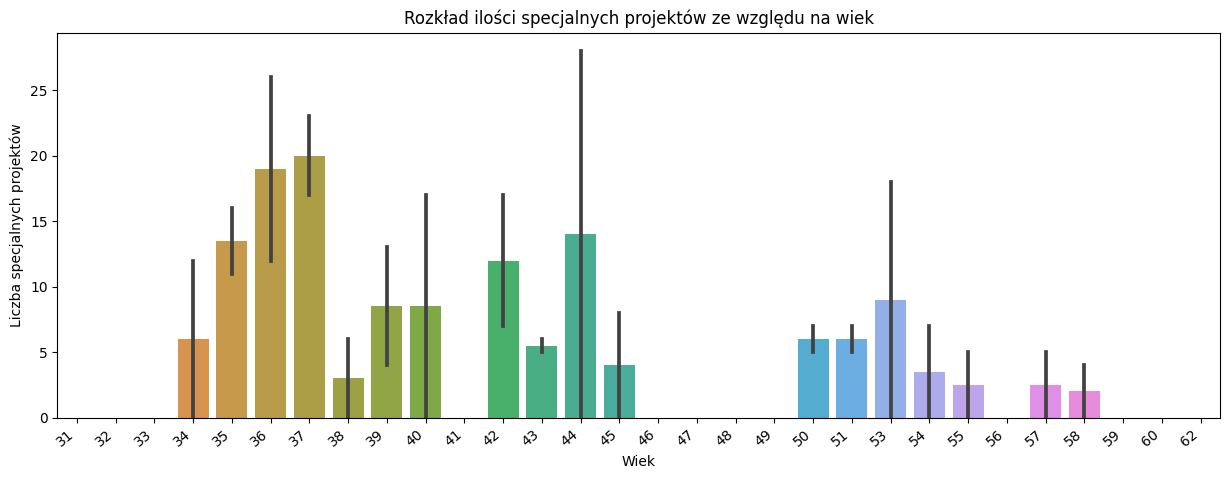

In [233]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x= 'age', y= 'SpecialProjectsCount', data= special_pivot)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 40, ha= "right")
plt.xlabel('Wiek')
plt.ylabel('Liczba specjalnych projektów')
plt.title('Rozkład ilości specjalnych projektów ze względu na wiek')
plt.show()

**Pracownicy urodzeni w roku 1979 i później pracują nad większą ilością specjalnych projektów.**

---

